<a href="https://colab.research.google.com/github/ImanFatasya/Wafer-Defect-Detection-using-Deep-Learning-FYP-/blob/main/Wafer_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

# Accessing Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Loading the saved data
train_X = torch.load('/content/drive/MyDrive/Colab Notebooks/train_X.pt')
test_X = torch.load('/content/drive/MyDrive/Colab Notebooks/test_X.pt')
train_Y = torch.load('/content/drive/MyDrive/Colab Notebooks/train_Y.pt')
test_Y = torch.load('/content/drive/MyDrive/Colab Notebooks/test_Y.pt')

Mounted at /content/drive


<ipython-input-1-60e45386f940>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_X = torch.load('/content/drive/MyDrive/Colab Notebooks/train_X.pt')
<ipython-input-1-60

In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

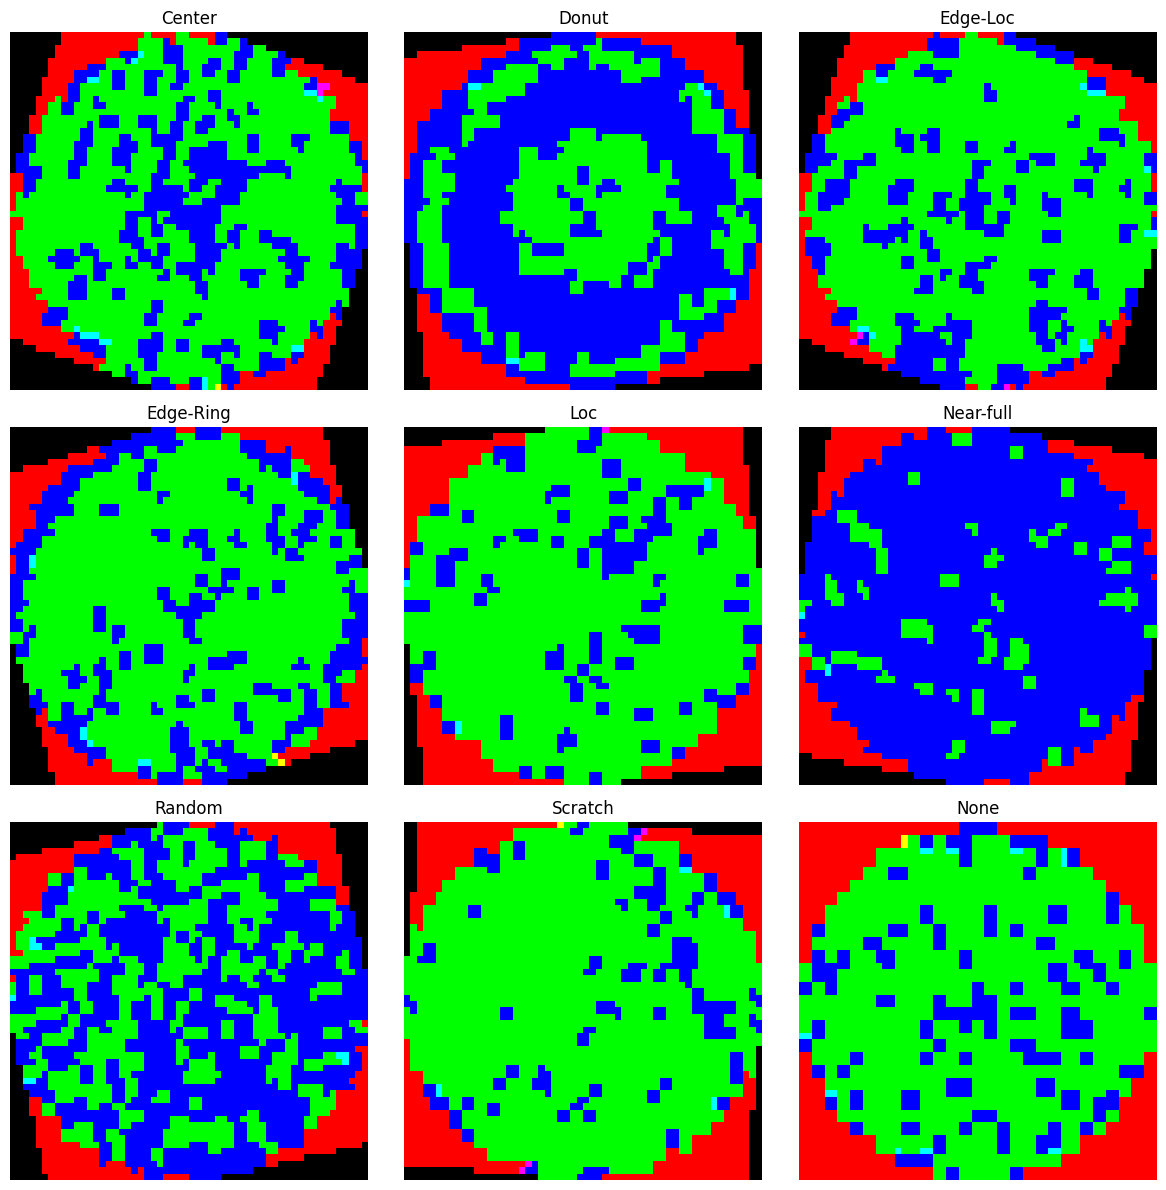

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Define class labels
class_labels = [
    "Center", "Donut", "Edge-Loc", "Edge-Ring",
    "Loc", "Near-full", "Random", "Scratch", "None"
]

# Directory to save images
output_dir = '/content/drive/MyDrive/wafer image/'
os.makedirs(output_dir, exist_ok=True)

# Select one image for each class and store it
selected_images = {}
for defect_type in range(len(class_labels)):
    # Find indices for the current defect type
    defect_indices = [idx for idx, label in enumerate(train_Y) if torch.argmax(label).item() == defect_type]

    # Select the first sample for each defect type
    if defect_indices:
        index = defect_indices[0]
        selected_images[class_labels[defect_type]] = train_X[index].permute(1, 2, 0).cpu().numpy()  # Convert to HWC format

        # Save the selected image to Google Drive
        image_path = os.path.join(output_dir, f'{class_labels[defect_type]}.png')
        plt.imsave(image_path, selected_images[class_labels[defect_type]])

# Plot and save the selected images
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i, (label, image) in enumerate(selected_images.items()):
    row, col = divmod(i, 3)
    axs[row, col].imshow(image)
    axs[row, col].set_title(label)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


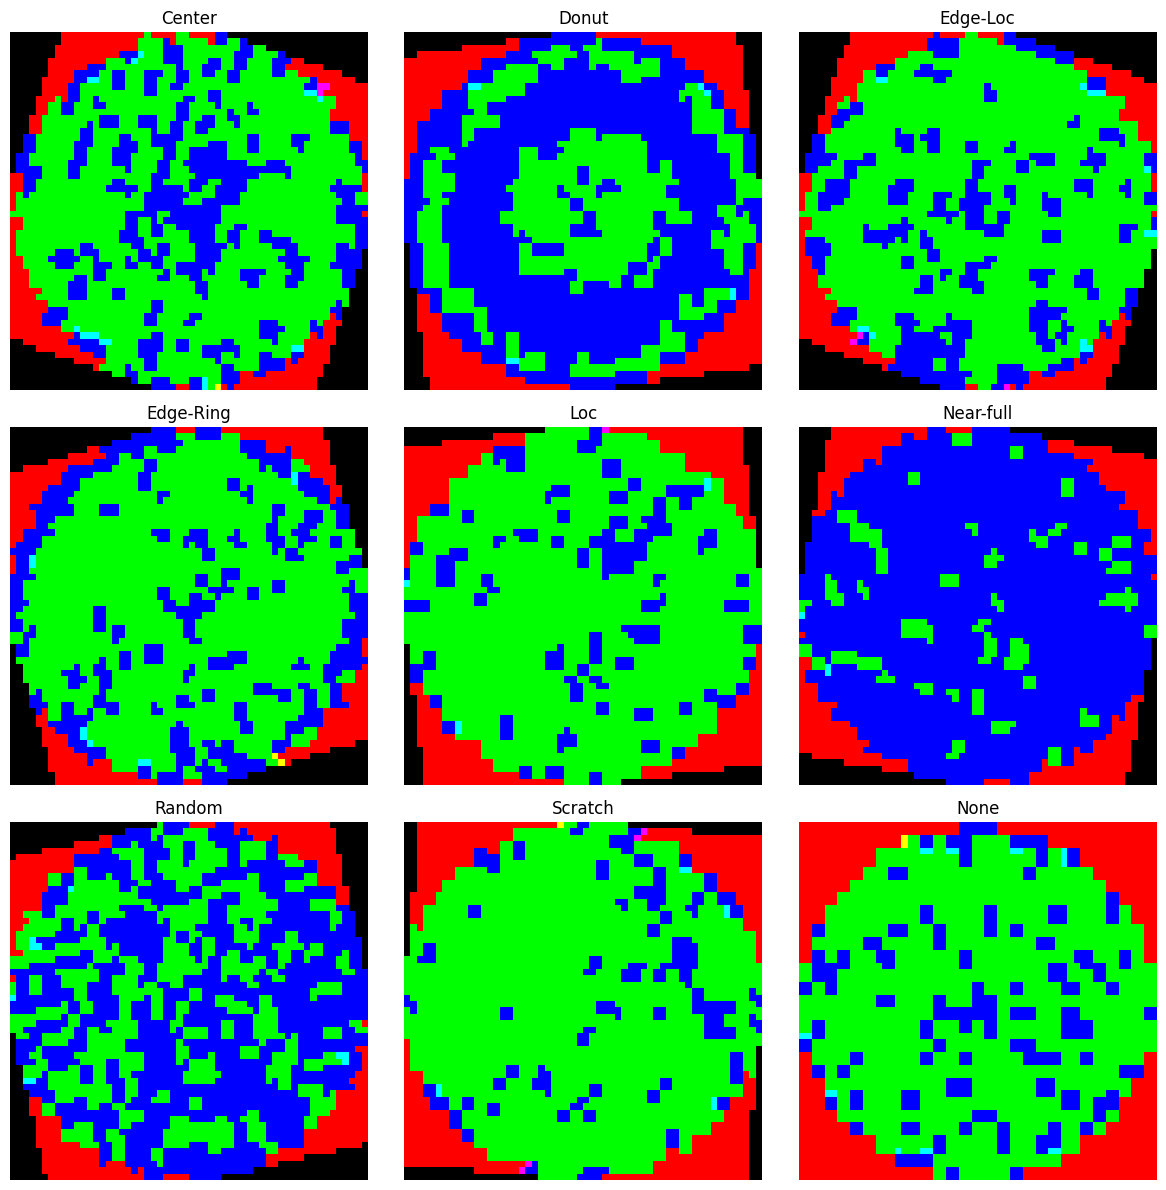

In [ ]:
# Define class labels
class_labels = [
    "Center", "Donut", "Edge-Loc", "Edge-Ring",
    "Loc", "Near-full", "Random", "Scratch", "None"
]

# Select one image for each class and store it
selected_images = {}
for defect_type in range(len(class_labels)):
    # Find indices for the current defect type
    defect_indices = [idx for idx, label in enumerate(train_Y) if torch.argmax(label).item() == defect_type]

    # Select the first sample for each defect type
    if defect_indices:
        index = defect_indices[0]
        selected_images[class_labels[defect_type]] = train_X[index].permute(1, 2, 0).cpu().numpy()  # Convert to HWC format

# Plot and save the selected images
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i, (label, image) in enumerate(selected_images.items()):
    row, col = divmod(i, 3)
    axs[row, col].imshow(image)
    axs[row, col].set_title(label)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

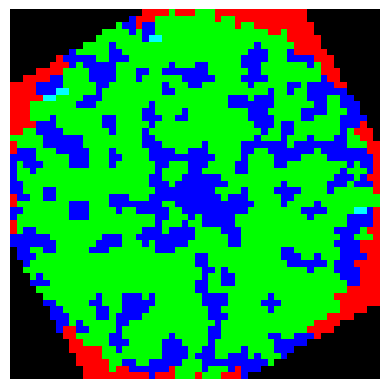

Image saved as defect_0_sample_11412.png. You can download it.


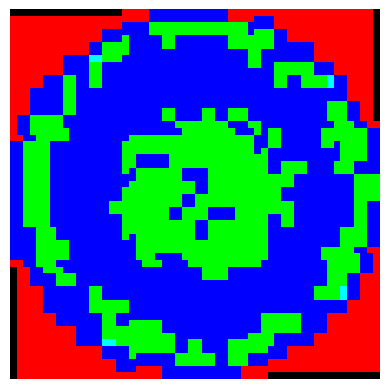

Image saved as defect_1_sample_2323.png. You can download it.


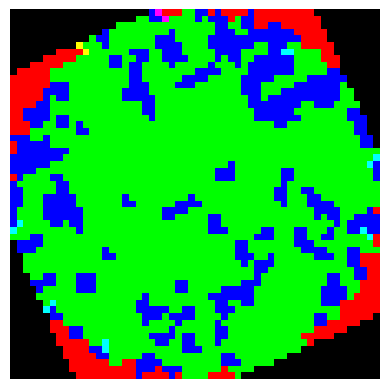

Image saved as defect_2_sample_467.png. You can download it.


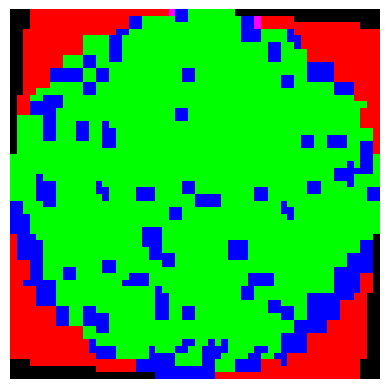

Image saved as defect_3_sample_14420.png. You can download it.


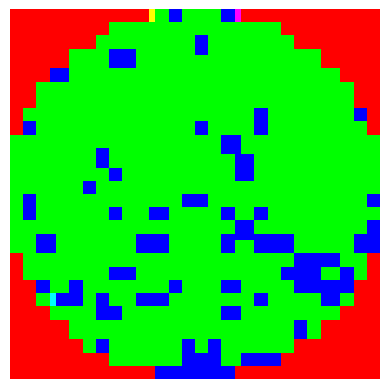

Image saved as defect_4_sample_4960.png. You can download it.


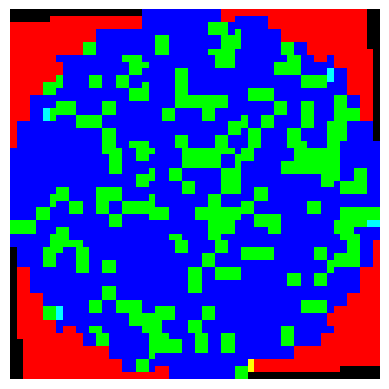

Image saved as defect_5_sample_4557.png. You can download it.


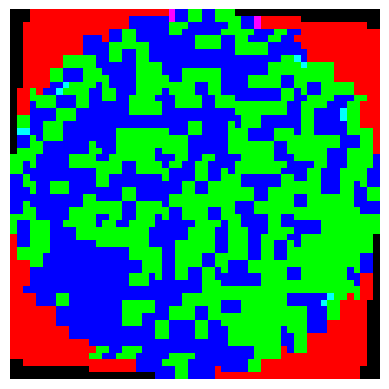

Image saved as defect_6_sample_4189.png. You can download it.


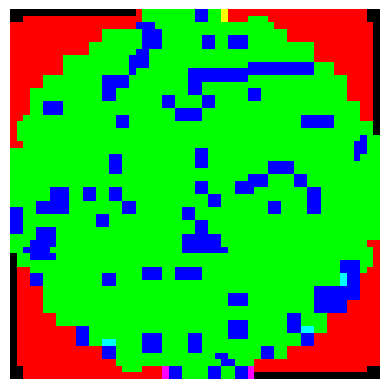

Image saved as defect_7_sample_2545.png. You can download it.


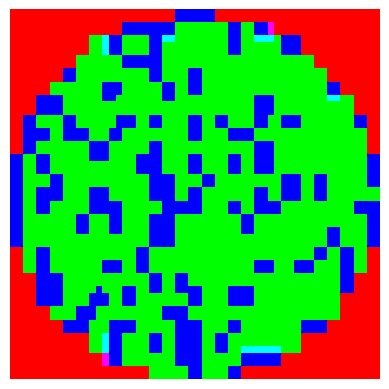

Image saved as defect_8_sample_13068.png. You can download it.


In [ ]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the number of defect types
num_defects = 9

# Seed for reproducibility
random.seed(42)

# Iterate over each defect type
for i, defect_type in enumerate(range(num_defects)):
    # Get the indices of samples matching the current defect type
    defect_indices = [idx for idx, label in enumerate(train_Y) if torch.argmax(label).item() == defect_type]

    # Randomly select one sample index from the current defect type
    index = random.choice(defect_indices)

    # Get the selected image
    image = train_X[index].permute(1, 2, 0).cpu().numpy()  # Convert to HWC format for matplotlib

    # Convert image to PIL format to save
    pil_image = Image.fromarray((image * 255).astype(np.uint8))  # Rescale to [0, 255] and convert to uint8

    # Save the image with a filename based on defect type
    image_filename = f"defect_{defect_type}_sample_{index}.png"
    pil_image.save(image_filename)

    # Display the image (optional)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis for cleaner visualization
    plt.show()

    # Provide download link
    print(f"Image saved as {image_filename}. You can download it.")


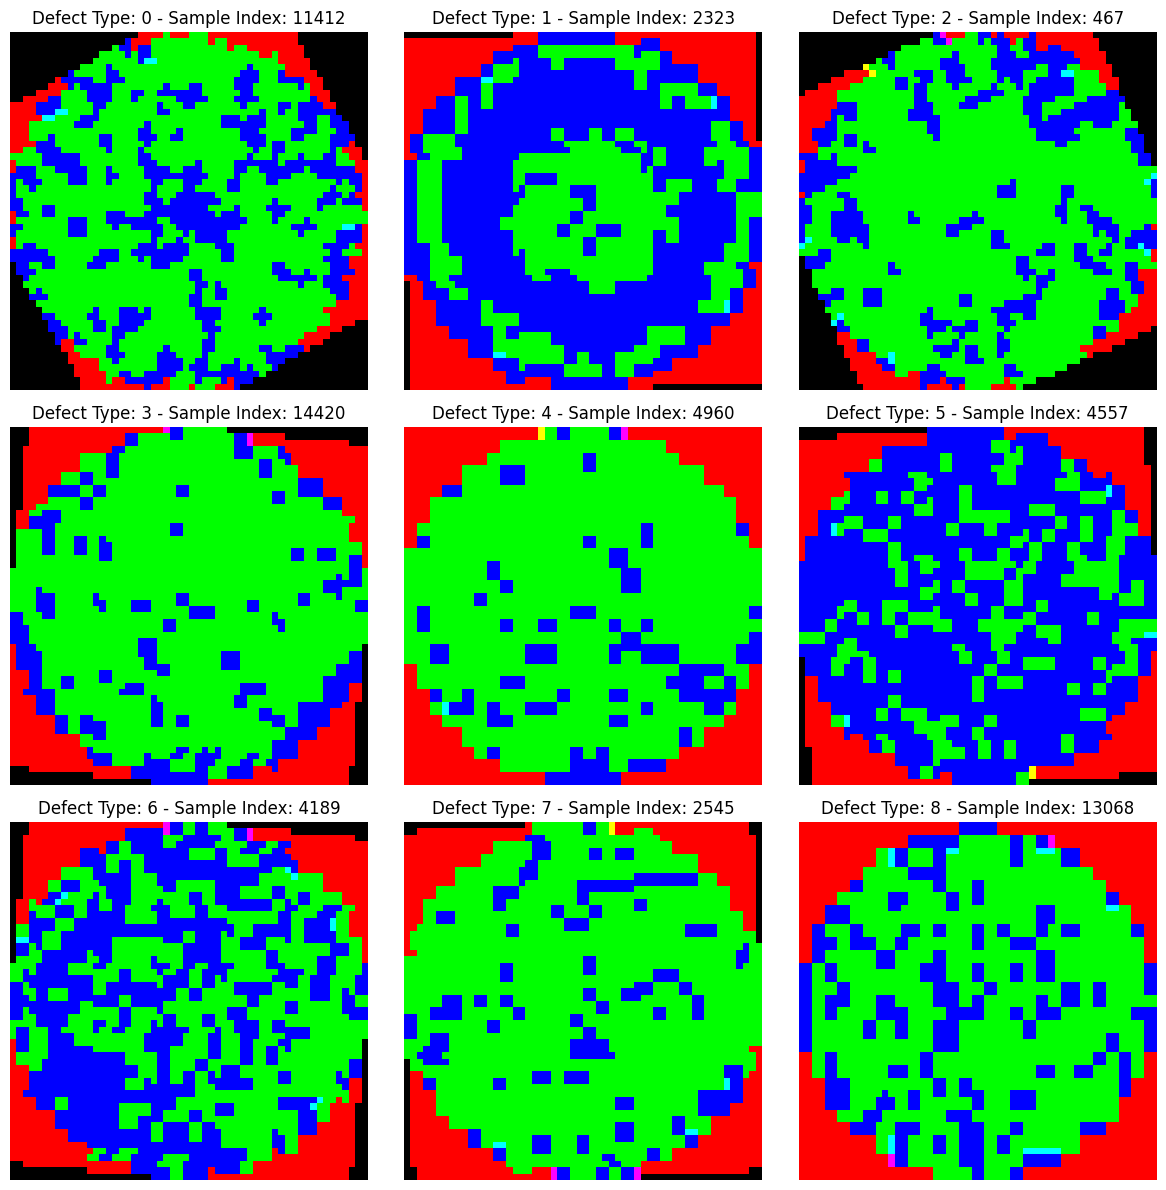

In [ ]:
#train images
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the number of defect types and create a 3x3 grid
num_defects = 9
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Seed for reproducibility
random.seed(42)

# Iterate over each defect type
for i, defect_type in enumerate(range(num_defects)):
    # Get the indices of samples matching the current defect type
    defect_indices = [idx for idx, label in enumerate(train_Y) if torch.argmax(label).item() == defect_type]

    # Randomly select one sample index from the current defect type
    index = random.choice(defect_indices)

    # Calculate subplot position
    row, col = divmod(i, 3)

    # Display the selected sample image in the grid
    axs[row, col].imshow(train_X[index].permute(1, 2, 0).cpu().numpy())  # Convert to HWC format for matplotlib
    axs[row, col].axis('off')  # Turn off axis for cleaner visualization
    axs[row, col].set_title(f'Defect Type: {defect_type} - Sample Index: {index}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


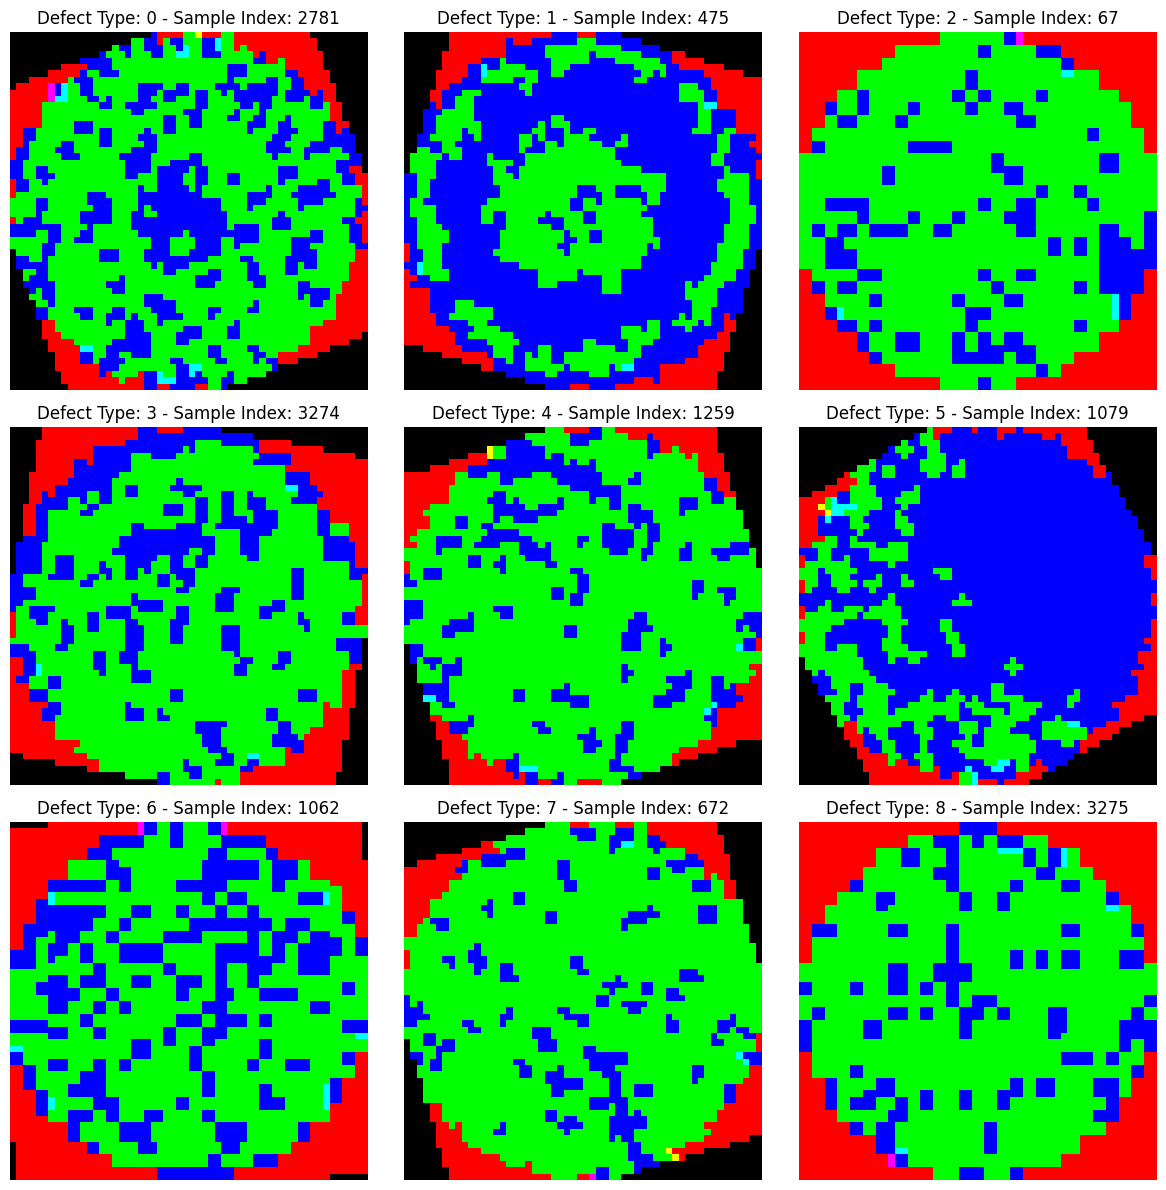

In [ ]:
#test set
# Define the number of defect types and create a 3x3 grid for test set
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Seed for reproducibility
random.seed(42)

# Iterate over each defect type in the test set
for i, defect_type in enumerate(range(num_defects)):
    # Get the indices of samples matching the current defect type in the test set
    defect_indices = [idx for idx, label in enumerate(test_Y) if torch.argmax(label).item() == defect_type]

    # Randomly select one sample index from the current defect type in the test set
    index = random.choice(defect_indices)

    # Calculate subplot position
    row, col = divmod(i, 3)

    # Display the selected sample image in the grid
    axs[row, col].imshow(test_X[index].permute(1, 2, 0).cpu().numpy())  # Convert to HWC format for matplotlib
    axs[row, col].axis('off')  # Turn off axis for cleaner visualization
    axs[row, col].set_title(f'Defect Type: {defect_type} - Sample Index: {index}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

